# Predicting Doctor's Consultation Fee

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading Train and Test datasets
Train_data=pd.read_excel("Final_Train_Doc.xlsx")
Test_data=pd.read_excel("Final_Test_Doc.xlsx")

In [3]:
#Displaying all columns
pd.set_option("display.max_columns",None)

In [4]:
#Checking first five rows of Train Data
Train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
#Checking first five rows of Test Data
Test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [6]:
#Checking shape of train and test data
print("Shape of Train_data: ",Train_data.shape)
print("Shape of Test_data: ",Test_data.shape)

Shape of Train_data:  (5961, 7)
Shape of Test_data:  (1987, 6)


# Note: We will analyze the Train Data and Test Data separately to avoid data leakage due to merging datasets.

In [7]:
#Checking the columns of Train Data
Train_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [8]:
#Checking for null values in Train Data
Train_data.isnull().values.any()

True

Observation: Null Values are present

In [9]:
#Checking which columns have null values
Train_data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Observation: Null values are present in 3 columns - Rating, Place and Miscellaneous_Info 

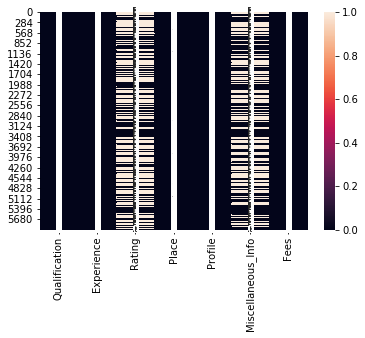

In [10]:
#Reconfirming presence of null values using visualisation
sns.heatmap(Train_data.isnull(),annot=True)
plt.show()

In [11]:
#Checking datatypes to determine how to treat the null values
Train_data.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [12]:
#Exploring the unique values of object data type columns
for column in Train_data.columns:
    if Train_data[column].dtype==object:
        print(str(column)+":"+str(Train_data[column].unique()))
        print(Train_data[column].value_counts())
        print("***********************")
        print("\n")

Qualification:['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
BDS                                                                                               488
BHMS                                                                                              477
BAMS                                                                                              471
MBBS                                                                                              334
MBBS, MS - ENT                                                                                    220
                                                                                                 ... 
DNB, MBBS, MD - Diabetology     

Observation: We need to split some columns to have a clean data so that we can fill the null values appropriately. 

In [13]:
#defining a function to keep only the number of years of experience and removing the other words
def years(y):
    exp=y.split(" ")
    return exp[0]
#Using the function in Train Data
Train_data["Experience"]=Train_data["Experience"].apply(years)
#Checking the Train data
Train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [14]:
#Similarly, removing the % sign from Rating column to keep only int 
def percent(p):
    rat=str(p).split("%")
    return rat[0]
#Using the function in Train Data
Train_data["Rating"]=Train_data["Rating"].apply(percent)
#Checking the Train data
Train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,nan,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,nan,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [15]:
#Similarly, removing extra information from Place column to keep only the city name
def city(c):
    loc=str(c).split(" ")
    return loc[-1]
#Using this function in train data
Train_data["Place"]=Train_data["Place"].apply(city)
#Checking the Train data
Train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,nan,Bangalore,ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,nan,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [16]:
#Dropping the Miscellaneous_Info column as the information is already available in other columns like rating and place
Train_data.drop("Miscellaneous_Info",axis=1,inplace=True)
Train_data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,nan,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",12,nan,Bangalore,Ayurveda,250
4,BAMS,20,100,Chennai,Ayurveda,250


In [17]:
#Checking data types
Train_data.dtypes

Qualification    object
Experience       object
Rating           object
Place            object
Profile          object
Fees              int64
dtype: object

In [18]:
#REplacing all nan values in Rating column with 0, later will impute them 
Train_data["Rating"]=Train_data["Rating"].replace(Train_data["Rating"].iloc[2],0)

In [19]:
Train_data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,0,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",12,0,Bangalore,Ayurveda,250
4,BAMS,20,100,Chennai,Ayurveda,250


In [20]:
#Checking null values again
Train_data.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

In [21]:
#Changing data type of Rating and Experience column from object to int
cols=["Experience","Rating"]
for col in cols:
    Train_data[col]=Train_data[col].astype(int)

In [22]:
#Checking data type again
Train_data.dtypes

Qualification    object
Experience        int32
Rating            int32
Place            object
Profile          object
Fees              int64
dtype: object

In [23]:
#Replacing "nan" calues with nan and then replacing null values in Place column with mode
Train_data.replace({"Place":{'nan':np.nan}},regex=False,inplace=True)
Train_data["Place"].fillna(Train_data["Place"].mode()[0], inplace=True)

In [24]:
#Replacing "e" with nan and then with Mode
Train_data.replace({"Place":{'e':np.nan}},regex=False,inplace=True)
Train_data["Place"].fillna(Train_data["Place"].mode()[0], inplace=True)

In [25]:
#Checking unique values in Place column to confirm if "nan" s removed
print(Train_data["Place"].unique())

['Ernakulam' 'Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Coimbatore'
 'Mumbai' 'Thiruvananthapuram']


In [26]:
#Checking null values again to confirm 
Train_data.isnull().values.any()

False

In [27]:
#There are no more null values present in our train data now

In [28]:
#Checking the shape
Train_data.shape

(5961, 6)

In [29]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   int32 
 2   Rating         5961 non-null   int32 
 3   Place          5961 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int32(2), int64(1), object(3)
memory usage: 233.0+ KB


Observations:

- 3 columns are object data type - Qualification, Place and Profile. 
    We must change the data type and value of these columns because our model doesn't understand string values

- 3 columns are int data dype - Experience, Rating and Fees




In [30]:
#Summary Statistics
Train_data.describe()

,Experience,Rating,Fees
count,5961.000000,5961.000000,5961.000000
mean,17.303976,42.217245,307.944640
std,11.142798,47.340934,190.920373
min,0.000000,0.000000,5.000000
25%,9.000000,0.000000,150.000000
50%,14.000000,0.000000,300.000000
75%,23.000000,96.000000,500.000000
max,66.000000,100.000000,950.000000


Observations:
- Minimum fees of the doctor is Rs. 5
- Maximum fees of the doctor is Rs. 950
- Mean is higher than median so Rating is right skewed

In [31]:
#Checking correlation
Train_data_cor=Train_data.corr()
Train_data_cor

,Experience,Rating,Fees
Experience,1.000000,-0.038569,0.002117
Rating,-0.038569,1.000000,0.153273
Fees,0.002117,0.153273,1.000000


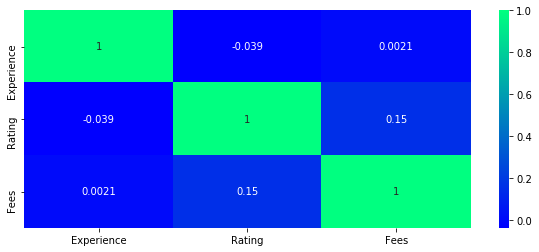

In [32]:
#Checking correlation on a heatmap
plt.figure(figsize=(10,4))
sns.heatmap(Train_data_cor,annot=True,cmap="winter")

Observation: Rating and Experience is positively correlated to Fees

# Exploratory Data Analysis

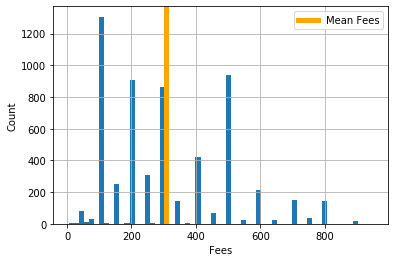

In [33]:
#Checking the mean Fees
fee=Train_data["Fees"].hist(bins=60)
mean_val=np.mean(Train_data["Fees"])
plt.axvline(mean_val,linewidth=5,color="orange",label="Mean Fees")
plt.xlabel("Fees")
plt.ylabel("Count")
plt.legend()
plt.show()

Observation: More than 1200 have received a fee of less than Rs. 300

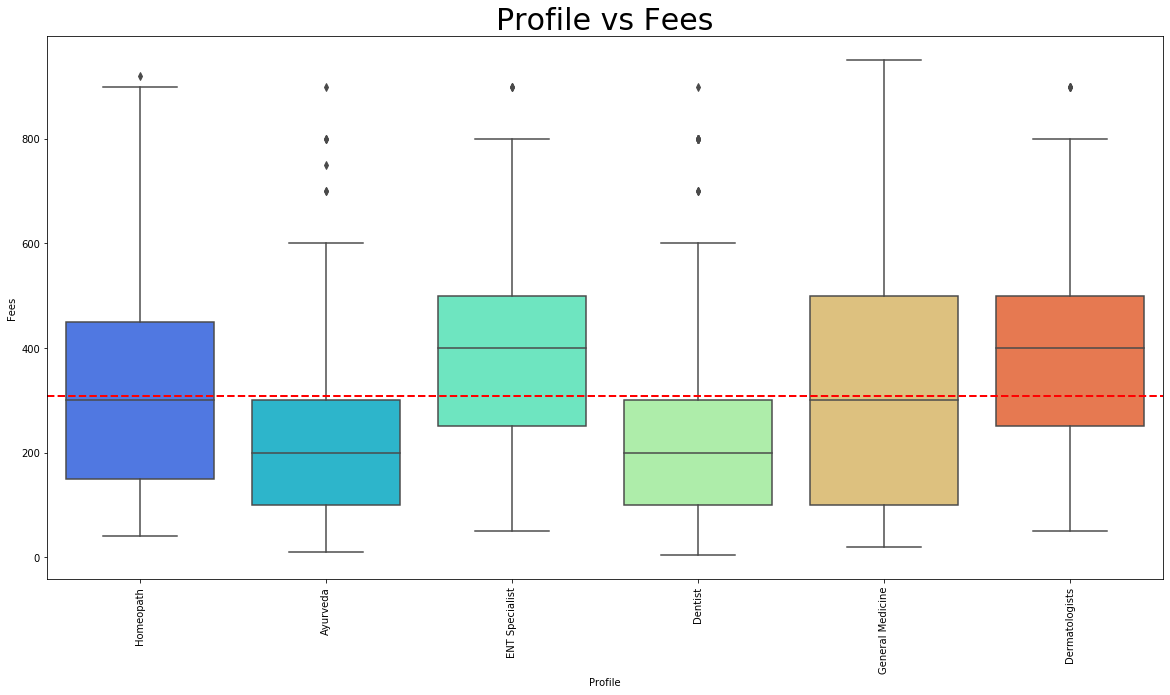

In [34]:
#Checking Profile vs Fees
plt.figure(figsize=(20,10))
mean_fees=np.mean(Train_data["Fees"])
sns.boxplot(y="Fees",x="Profile",data=Train_data,palette="rainbow")
plt.axhline(mean_fees,color="r",linestyle="dashed",linewidth=2)
plt.title("Profile vs Fees",fontsize=30)
plt.xticks(rotation="vertical")
plt.show()

Observation: There are outliers present in the train data and we need to treat the outliers

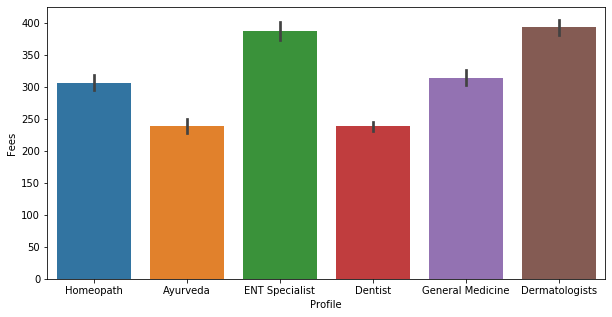

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x="Profile",y="Fees",data=Train_data)
plt.show()

Observation: Dermatologists have the highest price followed by ENT specialist

In [36]:
print(Train_data["Profile"].value_counts())

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


In [37]:
#Place vs Price
print(Train_data["Place"].value_counts())

Bangalore             1284
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Name: Place, dtype: int64


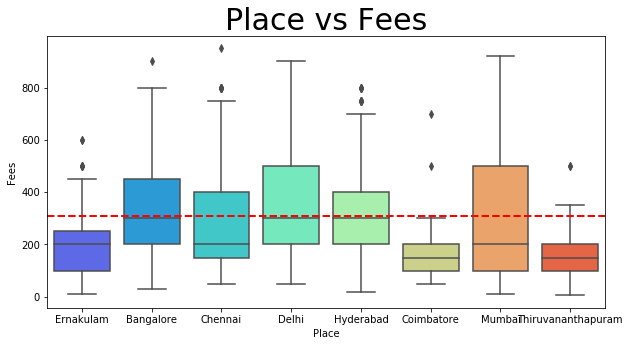

In [38]:
#Place vs Price
plt.figure(figsize=(10,5))
mean_fees=np.mean(Train_data["Fees"])
sns.boxplot(y="Fees",x="Place",data=Train_data,palette="rainbow")
plt.axhline(mean_fees,color="r",linestyle="dashed",linewidth=2)
plt.title("Place vs Fees",fontsize=30)
plt.xticks(rotation=0)
plt.show()

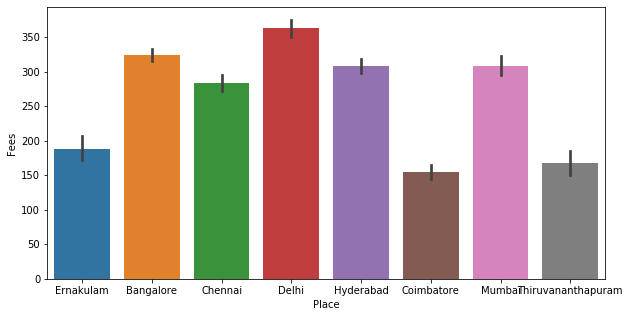

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x="Place",y="Fees",data=Train_data)
plt.show()

Observation: Fees is the highest in Delhi. 
Bangalore has the second highest fees followed by Mumbai and Hyderabad

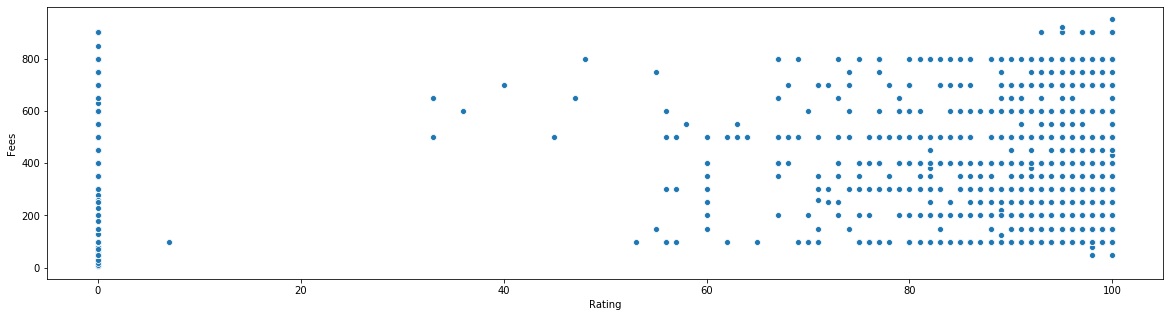

In [40]:
#Rating vs. Fees
plt.figure(figsize=(20,5))
sns.scatterplot(x="Rating",y="Fees",data=Train_data)
plt.show()

Observation: Fees is either high in higher rating or 0 rating

In [41]:
#Checking skewness
Train_data.skew()

Experience    0.991089
Rating        0.247186
Fees          0.751870
dtype: float64

In [42]:
#Removing skewness via log method
Train_data["Fees"]=np.log(Train_data["Fees"])

In [43]:
#Checking skewness again
Train_data.skew()

Experience    0.991089
Rating        0.247186
Fees         -0.309098
dtype: float64

In [45]:
#Removing skewness
Train_data["Fees"]=np.log(Train_data["Fees"])

In [46]:
#Checking skewness again
Train_data.skew()

Experience    0.991089
Rating        0.247186
Fees         -0.678003
dtype: float64

In [47]:
#COnverting obj data type into numeric using label encoder to build the model
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=["Qualification","Place","Profile"]
for col in columns:
    if Train_data[col].dtype==np.number:
        continue
    Train_data[col]=le.fit_transform(Train_data[col])

In [48]:
Train_data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,401,24,100,4,5,1.527180
1,73,12,98,0,0,1.767797
2,1135,9,0,0,3,1.741130
3,464,12,0,0,0,1.708642
4,10,20,100,1,0,1.708642


Qualification       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Experience       AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Rating           AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Place            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Profile          AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Fees             AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
dtype: object

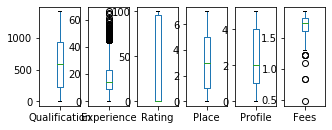

In [50]:
#plotting outliers
Train_data.plot(kind="box",subplots=True,layout=(2,7))

In [52]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(Train_data))
Train_data_new=Train_data[(z<3).all(axis=1)]
print(Train_data.shape)
print(Train_data_new.shape)

(5961, 6)
(5913, 6)


In [53]:
Train_data=Train_data_new
Train_data.shape

(5913, 6)

Outliers have now been removed

In [55]:
#Following the same steps for Test Data in one cell

In [65]:
#Checking first five rows of Test Data
Test_data.head()

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35,nan,Mumbai,General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,nan,Hyderabad,ENT Specialist
2,"MBBS, DDVL",40,0,Chennai,Dermatologists
3,BAMS,0,nan,Delhi,Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Bangalore,Dentist


In [64]:
Test_data.dtypes

Qualification    object
Experience        int32
Rating           object
Place            object
Profile          object
dtype: object

In [68]:
#Checking unique values in Experience
print(Test_data["Experience"].unique())

[35 31 40  0 16 14 23  9 11 44  4 34 13 28  6 32  3  8 43 27 22 25 36 17
 20 18 29  5 19 10  2 30 24 26 41 46 21 12 45 33 38  7 59 15 39 42 54 49
 48 52 51 50 37 47 53 56 65]


In [69]:
#Checking unique values in Place
print(Test_data["Place"].unique())

['Mumbai' 'Hyderabad' 'Chennai' 'Delhi' 'Bangalore' 'Coimbatore'
 'Thiruvananthapuram' 'Ernakulam' 'nan']


In [70]:
#Replacing "nan" values with nan and then replacing null values in Place column with mode
Test_data.replace({"Place":{'nan':np.nan}},regex=False,inplace=True)
Test_data["Place"].fillna(Test_data["Place"].mode()[0], inplace=True)
#Checking unique values in Place
print(Test_data["Place"].unique())

['Mumbai' 'Hyderabad' 'Chennai' 'Delhi' 'Bangalore' 'Coimbatore'
 'Thiruvananthapuram' 'Ernakulam']


In [71]:
#Checking unique values in Profile
print(Test_data["Profile"].unique())

['General Medicine' 'ENT Specialist' 'Dermatologists' 'Ayurveda' 'Dentist'
 'Homeopath']


In [73]:
#Replacing all nan values in Rating column with 0, later will impute them 
Test_data["Rating"]=Test_data["Rating"].replace(Test_data["Rating"].iloc[0],0)

In [74]:
#Changing data type of Rating from object to int
Test_data["Rating"]=Test_data["Rating"].astype(int)

In [75]:
Test_data.dtypes

Qualification    object
Experience        int32
Rating            int32
Place            object
Profile          object
dtype: object

In [76]:
#Summary Statistics
Test_data.describe()

,Experience,Rating
count,1987.000000,1987.000000
mean,17.874685,42.493206
std,11.366764,47.306561
min,0.000000,0.000000
25%,9.000000,0.000000
50%,15.000000,0.000000
75%,24.000000,96.000000
max,65.000000,100.000000


In [77]:
Test_data.skew()

Experience    0.963447
Rating        0.232078
dtype: float64

In [78]:
#COnverting obj data type into numeric using label encoder to build the model
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=["Qualification","Place","Profile"]
for col in columns:
    if Test_data[col].dtype==np.number:
        continue
    Test_data[col]=le.fit_transform(Test_data[col])

In [79]:
Test_data.head()

,Qualification,Experience,Rating,Place,Profile
0,241,35,0,6,4
1,340,31,0,5,3
2,258,40,0,1,2
3,6,0,0,3,0
4,79,16,100,0,1


Qualification       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Experience       AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Rating           AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Place            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Profile          AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
dtype: object

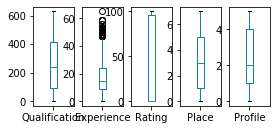

In [80]:
#plotting outliers
Test_data.plot(kind="box",subplots=True,layout=(2,7))

In [81]:
#Removing OUtliers
from scipy.stats import zscore
z=np.abs(zscore(Test_data))
Test_data_new=Test_data[(z<3).all(axis=1)]
print(Test_data.shape)
print(Test_data_new.shape)

(1987, 5)
(1976, 5)


In [82]:
Test_data=Test_data_new
Test_data.shape

(1976, 5)

In [83]:
#Splitting data into input and output variable
x=Train_data.drop(columns=["Fees"],axis=1)
x.head()

,Qualification,Experience,Rating,Place,Profile
0,401,24,100,4,5
1,73,12,98,0,0
2,1135,9,0,0,3
3,464,12,0,0,0
4,10,20,100,1,0


In [85]:
y=Train_data["Fees"]
y.head()

0    1.527180
1    1.767797
2    1.741130
3    1.708642
4    1.708642
Name: Fees, dtype: float64

In [86]:
#Checking the shape of input and output variable
print(x.shape)
print(y.shape)

(5913, 5)
(5913,)


In [88]:
#Scaling the input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [89]:
#Splitting data into training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=42)

In [90]:
#Checing the shape
print(x_train.shape)
print(x_test.shape)

(5893, 5)
(20, 5)


In [93]:
#importing model libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#importing boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score 

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Score of",m,"is",score)
    print("Mean Abs Error ",mean_absolute_error(y_test,predm))
    print("Mean Squared Error ",mean_squared_error(y_test,predm))
    print("RMSE ",np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score",r2_score(y_test,predm))
    print("***********************************")
    print("\n")


Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is 0.09905165119291626
Mean Abs Error  0.09961124288011913
Mean Squared Error  0.01485626350302672
RMSE  0.12188627282441088
r2_score -0.11594766492528663
***********************************


Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is 0.20619290077726238
Mean Abs Error  0.09728282460124958
Mean Squared Error  0.01469333084161913
RMSE  0.12121605026406004
r2_score -0.10370876494880044
***********************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
               

In [94]:
#Cross Validating all algorithms 
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring="r2")
    print("Model",m)
    print("Score",score)
    print("Mean Score:",score.mean())
    print("Standard Deviation",score.std())
    print("***********************************")
    print("\n")

Model LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Score [0.09622664 0.09491847 0.1206814  0.06590883 0.08142708 0.08435866
 0.10160708 0.09956363 0.09057285 0.12124706]
Mean Score: 0.09565117027028956
Standard Deviation 0.016042294471542644
***********************************


Model SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Score [0.10811101 0.14258658 0.16311272 0.1099922  0.15535917 0.17139915
 0.16821163 0.14038916 0.12007085 0.16699653]
Mean Score: 0.1446228987319968
Standard Deviation 0.023212912727905047
***********************************


Model DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_w

In [ ]:
#Choosing Random Forest as my model
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators":[400,500,600,700],"max_depth":[4,5,6,15,20]}
RFC=RandomForestRegressor()
clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

In [101]:
#Using the model with best parameters
rf=RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=1,max_features="auto",max_depth=20)
rf.fit(x_train,y_train)
print("score:",rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print("**********")
print("Mean Abs Error ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error ",mean_squared_error(y_test,y_pred))
print("RMSE ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score",r2_score(y_test,y_pred))

score: 0.515950652825677
**********
Mean Abs Error  0.10521439687864853
Mean Squared Error  0.016947239095458835
RMSE  0.13018156204109257
r2_score -0.27301403153321524


In [102]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(rf,"Doctor's Fee prdiction.csv")

["Doctor's Fee prdiction.csv"]